# Optimización de hiperparámetros: tune-sklearn

[Tune-sklearn](https://github.com/ray-project/tune-sklearn) es un sustituto del módulo de selección de modelos de Scikit-Learn (GridSearchCV, RandomizedSearchCV) con técnicas de ajuste de hiperparámetros de última generación.

pip install tune-sklearn ray[tune]

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.metrics import accuracy_score

from tune_sklearn import TuneSearchCV

from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = datasets.load_iris()


X = iris.data
y = iris.target
    
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1234)

In [3]:
param_dists = {
   'max_depth':list(range(1,20)),
    'max_features': list(range(1,5)),
    'n_estimators': list(range(1,20)),
    'criterion': ["gini", "entropy"]
}

## Random Search

In [4]:
tune_search = TuneSearchCV(RandomForestClassifier(),
    param_distributions=param_dists,
    n_trials=10,
    scoring='accuracy',
    search_optimization="random",
    random_state=1234,
    cv=5,
    n_jobs=-1,
    use_gpu=True
)

tune_search.fit(X_train, y_train)
print(f'Best score: {tune_search.best_score_}', f'\nBest parameters: {tune_search.best_params_}') 

Best score: 0.9583333333333333 
Best parameters: {'max_depth': 8, 'max_features': 2, 'n_estimators': 15, 'criterion': 'gini'}


In [5]:
pred = tune_search.predict(X_test)
accuracy_score(y_test, pred)

1.0

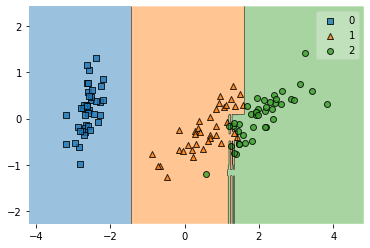

In [6]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)

best_params = tune_search.best_params_
best_params['max_features']=2

clf = RandomForestClassifier(**best_params)
clf.fit(principalComponents,y_train)

plot_decision_regions(X=principalComponents, y=y_train, clf=clf);

## Hyperopt: HyperOptSearch

[Hyperopt](https://github.com/hyperopt/hyperopt) es una biblioteca de Python para la optimización en serie y en paralelo sobre espacios de búsqueda complicados, que pueden incluir dimensiones de numéricas reales, discretas y condicionales.

pip install hyperopt

In [7]:
tune_search = TuneSearchCV(RandomForestClassifier(),
    param_distributions=param_dists,
    n_trials=10,
    scoring='accuracy',
    search_optimization="hyperopt",
    random_state=1234,
    cv=5,
    n_jobs=-1,
    use_gpu=True
)

tune_search.fit(X_train, y_train)
print(f'Best score: {tune_search.best_score_}', f'\nBest parameters: {tune_search.best_params_}') 

Best score: 0.95 
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 4, 'n_estimators': 14}


In [8]:
pred = tune_search.predict(X_test)
accuracy_score(y_test, pred)

1.0

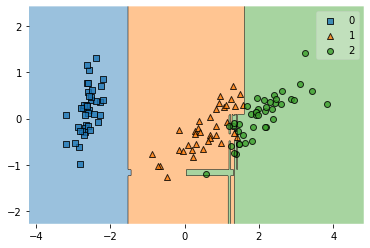

In [9]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)

best_params = tune_search.best_params_
best_params['max_features']=2

clf = RandomForestClassifier(**tune_search.best_params_)
clf.fit(principalComponents,y_train)

plot_decision_regions(X=principalComponents, y=y_train, clf=clf);

## Scikit-Optimize: SkoptSearch

[Scikit-Optimize](https://github.com/scikit-optimize/scikit-optimize), o skopt, es una biblioteca simple y eficiente para minimizar funciones de caja negra (muy) costosas y ruidosas. Implementa varios métodos para la optimización secuencial basada en modelos. skopt pretende ser accesible y fácil de usar en muchos contextos.

La biblioteca está construida sobre NumPy, SciPy y Scikit-Learn.

pip install scikit-optimize

In [10]:
tune_search = TuneSearchCV(RandomForestClassifier(),
    param_distributions=param_dists,
    n_trials=10,
    scoring='accuracy',
    search_optimization="bayesian",
    random_state=1234,
    cv=5,
    n_jobs=-1,
    use_gpu=True
)

tune_search.fit(X_train, y_train)
print(f'Best score: {tune_search.best_score_}', f'\nBest parameters: {tune_search.best_params_}') 

Trial Runner checkpointing failed: can't pickle dict_values objects
Trial Runner checkpointing failed: can't pickle dict_values objects


Best score: 0.9583333333333334 
Best parameters: {'max_depth': 7, 'max_features': 3, 'n_estimators': 3, 'criterion': 'entropy'}


In [11]:
pred = tune_search.predict(X_test)
accuracy_score(y_test, pred)

1.0

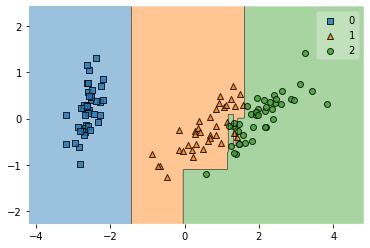

In [12]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)

best_params = tune_search.best_params_
best_params['max_features']=2

clf = RandomForestClassifier(**best_params)
clf.fit(principalComponents,y_train)

plot_decision_regions(X=principalComponents, y=y_train, clf=clf);

## Optuna: Optuna

[Optuna](https://github.com/optuna/optuna) es un marco de software de optimización automática de hiperparámetros, especialmente diseñado para el aprendizaje automático. Cuenta con una API de usuario de estilo imperativo, define-by-run. Gracias a su define-by-run API, el código escrito con Optuna goza de una gran modularidad, y el usuario de Optuna puede construir dinámicamente los espacios de búsqueda para los hiperparámetros.

pip install optuna

In [13]:
tune_search = TuneSearchCV(RandomForestClassifier(),
    param_distributions=param_dists,
    n_trials=10,
    scoring='accuracy',
    search_optimization="optuna",
    random_state=1234,
    cv=5,
    n_jobs=-1,
    use_gpu=True
)

tune_search.fit(X_train, y_train)
print(f'Best score: {tune_search.best_score_}', f'\nBest parameters: {tune_search.best_params_}') 

[I 2021-02-22 14:33:44,512] A new study created in memory with name: optuna


Best score: 0.9583333333333333 
Best parameters: {'max_depth': 3, 'max_features': 4, 'n_estimators': 13, 'criterion': 'entropy'}


In [14]:
pred = tune_search.predict(X_test)
accuracy_score(y_test, pred)

1.0

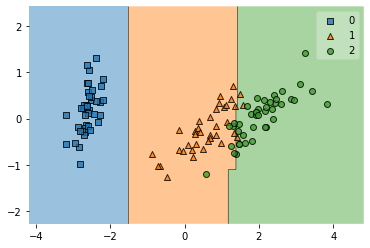

In [15]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)

best_params = tune_search.best_params_
best_params['max_features']=2

clf = RandomForestClassifier(**best_params)
clf.fit(principalComponents,y_train)

plot_decision_regions(X=principalComponents, y=y_train, clf=clf);

## Métricas de evaluación personalizadas

En ocasiones las métricas dsiponibles para evaluar la calidad predictiva de un modelo de Machine Learning no son las adecuadas. Para ello podemos utilizar la función make_scorer y crear un scorer válido de scikit-learn desde cualquier métrica o función de perdida que decidamos utilizar, existente en scikit learn o creada por nosotros.

In [16]:
from sklearn.metrics import make_scorer, matthews_corrcoef
import numpy as np

In [17]:
# Desde una métrica existente
mcc = make_scorer(matthews_corrcoef)

In [18]:
tune_search = TuneSearchCV(RandomForestClassifier(),
    param_distributions=param_dists,
    n_trials=10,
    scoring=mcc,
    search_optimization="bayesian",
    random_state=1234,
    cv=5
)

tune_search.fit(X_train, y_train)
print(f'Best score: {tune_search.best_score_}', f'\nBest parameters: {tune_search.best_params_}') 

Trial Runner checkpointing failed: can't pickle dict_values objects
Trial Runner checkpointing failed: can't pickle dict_values objects


Best score: 0.928474324772397 
Best parameters: {'max_depth': 14, 'max_features': 4, 'n_estimators': 19, 'criterion': 'entropy'}


In [19]:
pred = tune_search.predict(X_test)
accuracy_score(y_test, pred)

1.0

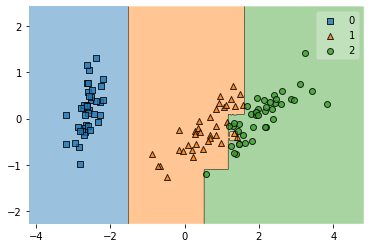

In [20]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)

best_params = tune_search.best_params_
best_params['max_features']=2

clf = RandomForestClassifier(**best_params)
clf.fit(principalComponents,y_train)

plot_decision_regions(X=principalComponents, y=y_train, clf=clf);

In [21]:
# Desde una métrica definida por nosotros
def my_eval_metric(y_true, y_pred):
    return np.sum((y_true == y_pred))/len(y_true)

mem = make_scorer(my_eval_metric)

In [22]:
tune_search = TuneSearchCV(RandomForestClassifier(),
    param_distributions=param_dists,
    n_trials=10,
    scoring=mem,
    search_optimization="bayesian",
    random_state=1234,
    cv=5
)

tune_search.fit(X_train, y_train)
print(f'Best score: {tune_search.best_score_}', f'\nBest parameters: {tune_search.best_params_}') 

Trial Runner checkpointing failed: can't pickle dict_values objects
Trial Runner checkpointing failed: can't pickle dict_values objects


Best score: 0.95 
Best parameters: {'max_depth': 10, 'max_features': 3, 'n_estimators': 12, 'criterion': 'gini'}


In [23]:
pred = tune_search.predict(X_test)
accuracy_score(y_test, pred)

1.0

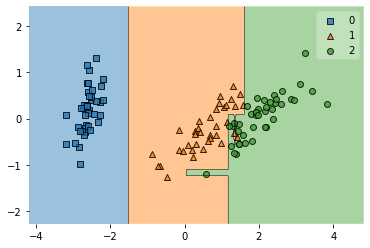

In [24]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)

best_params = tune_search.best_params_
best_params['max_features']=2

clf = RandomForestClassifier(**best_params)
clf.fit(principalComponents,y_train)

plot_decision_regions(X=principalComponents, y=y_train, clf=clf);